# SATURNN and its approximation by a Kernel Logistic Regression applied to a simulated data

**References for these algorithms**:

(English)

Marie Guyomard, Susana Barbosa, Lionel Fillatre, Kernel Logistic Regression Approximation of an Understandable ReLU Neural Network, International Conference on Machine Learning (ICML), 2023.

Marie Guyomard, Susana Barbosa, Lionel Fillatre, Understandable ReLU Neural Network for signal classification, International Conference on Acoustics, Speech, and Signal Processing (ICASSP), 2023.

(French)

Marie Guyomard, Susana Barbosa, Lionel Fillatre, R ́egression Logistique à Noyau équivalente à un Réseau de Neurones Interprétable, Groupe de Recherche et d’Etudes de Traitement du Signal et des Images (Gretsi), 2023.

Marie Guyomard, Susana Barbosa, Lionel Fillatre, Approximation d’un Réseau de Neurones ReLU interprétable par une Régression Logistique à Noyau, Journées de la Statistique (JDS), 2023.

## Import the functions

In [1]:
run SATURNN_functions.ipynb

## Simulated Data

In [2]:
from sklearn.datasets import make_circles

In [3]:
np.random.seed(407)
X, Y = make_circles(n_samples=400, factor=0.5, noise=0.2, random_state=1)
X = pd.DataFrame(X, columns=['X1','X2'])

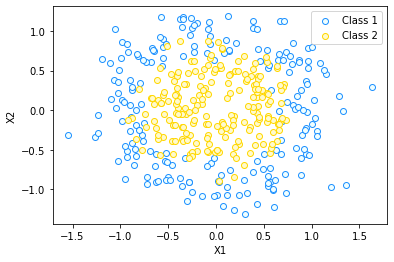

In [4]:
plt.scatter(X.loc[np.where(np.array(Y)==0)[0], 'X1'], X.loc[np.where(np.array(Y)==0)[0], 'X2'], edgecolor='dodgerblue', color='azure')
plt.scatter(X.loc[np.where(np.array(Y)==1)[0], 'X1'], X.loc[np.where(np.array(Y)==1)[0], 'X2'], edgecolor='gold', color='lemonchiffon')
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend(['Class 1', 'Class 2'])

Normalized meshgrid

In [5]:
normalisation = 'min_max'

if normalisation == 'mean_sd':
    scaler = StandardScaler(copy=True, with_mean=True, with_std=True)
    scaler.fit(self.X)
    X_norm = pd.DataFrame(scaler.transform(X), columns = X.columns)

if normalisation == 'min_max' :
    scaler = MinMaxScaler(feature_range=(-1, 1))
    scaler.fit(X)
    X_norm = pd.DataFrame(scaler.transform(X), columns = X.columns)

if normalisation == 'none' :
    X_norm = X.copy()

meshgrid = np.meshgrid(np.linspace(np.min(X_norm['X1']), np.max(X_norm['X1']), 300), np.linspace(np.min(X_norm['X2']), np.max(X_norm['X2']), 300))
data_grid=pd.DataFrame({'xx1': meshgrid[0].ravel(), 'xx2':meshgrid[1].ravel()})
xx1, xx2 = meshgrid[0], meshgrid[1]

## SATURNN

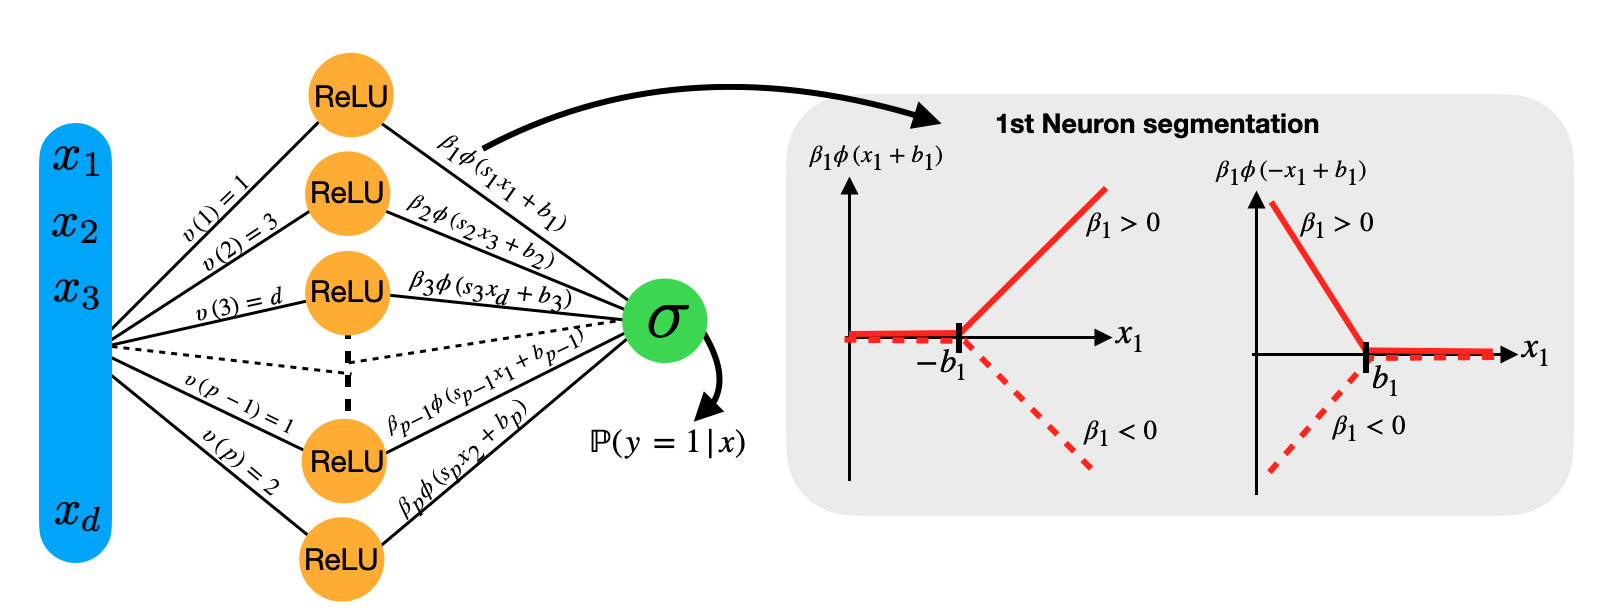

In [6]:
from IPython import display
display.Image('Schema_SATURNN.png', width=800)

**Modeling**

The SATURNN is a 1-Layer Neural Network for classification:
$$\Phi^\text{SATURNN}(x,\theta) = \sigma(\psi(x, \theta)),$$
with 
$\sigma$ the sigmoid activation:
$$\sigma(x) = \frac{1}{1+\exp(-x)},$$
and $\psi(x,\theta)$ the score function defined by :
$$\psi(x, \theta) = \frac{1}{\sqrt p} \left[ \beta_0 + \sum_{k=1}^p \beta_k \phi(s_kx_{\upsilon(k)} + b_k) \right],$$
with $\theta = [\beta^T, b^T]^T \in \mathbb{R}^{2p+1}$ are the trainable parameters and $x^T$ is the transpose of $x$ such that $x \in \mathcal{B}_2^d(0,r)$, $r>0$.

For the neuron $k$, we have:
- $\upsilon_k = \{1,\ldots,d\}$ is the input selector indicating which feature is handled by the neuron
- $b_k$ is the threshold from which the non-linear effect will be created
- $s_k = \{-1,1\}$ indicates if the non-linear effect will be created on the left or on the right of the treshold $b_k$
- $\beta_k$ indicates the impact of the non-linear effect on the estimated probability



**Initialization Process**


For all $k \in \{1, \dots, p\}$:
- Fixed Parameters after initialization
    - $\upsilon_k(x) \sim \mathcal{U}[\![ 1, d]\!]$
    - $s_k \sim \mathcal{B}(1/2)$
- Trainable parameters : $\theta^{(0)} = [\beta_0^{(0)}, \beta_1^{(0)}, \dots, \beta_p^{(0)}, b_1^{(0)}, \dots, b_p^{(0)}]$
    - $b_k \sim \mathcal{U}[-r, r]$
    - $\beta_k \sim \mathcal{N}(0,1)$
    
    
    
    
**Learning of the SATURNN**

Learning SATURNN requires to minimize the following cost function:
$$\mathcal{L}^{\text{SATURNN}}(\theta)= \frac{1}{N} \sum_{i=1}^N L\left(\sigma(\psi(x^{(i)}, \theta)), y^{(i)}\right),$$
such that
$$\hat{\theta}^{\text{SATURNN}} = \arg\min_{\theta \in \mathcal{B}_2^{2p+1}(\theta^{(0)}, R)}   \mathcal{L}^{\text{SATURNN}}(\theta),$$
with $L(\cdot)$ the binary cross-entropy used for binary classification tasks 
$$L\left(\hat{y}, y\right)=-y\log(\hat{y})-(1-y)\log(1-\hat{y}).$$



### Cross Validation over 5-folds

Parameters:
- nb_neurons: number of neurons composing the SATURNN
- normalisation: information about the data normalization {min_max, mean_sd, None}
- r: the radius of the open ball on which the data lie
- nb_folds: number of folds
- epoch: number of iterations for the training
- learning_rate: step of the gradient descent
- l2_reg: $\ell_2$-regulariation. The higher the parameter is, the more the model will be constrained such that the estimated parameters stays closed to the initialized ones

In [7]:
nb_neurons = 10
normalisation = 'min_max'
r = 1
nb_folds = 5
epoch = 20000
learning_rate = 1e-1
l2_reg = 0

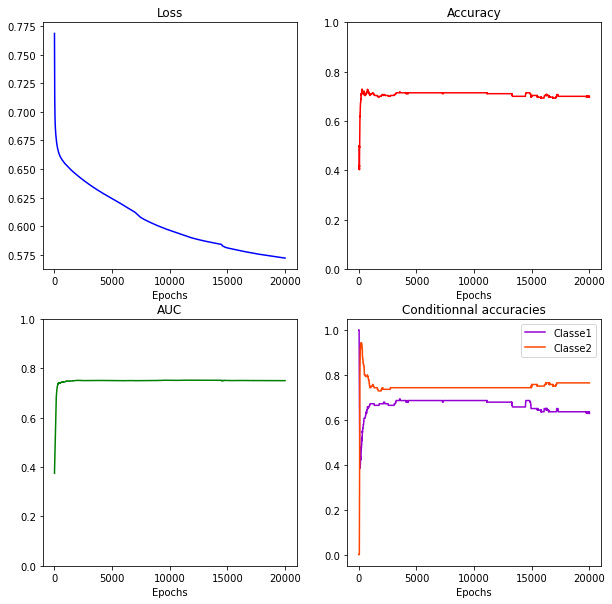

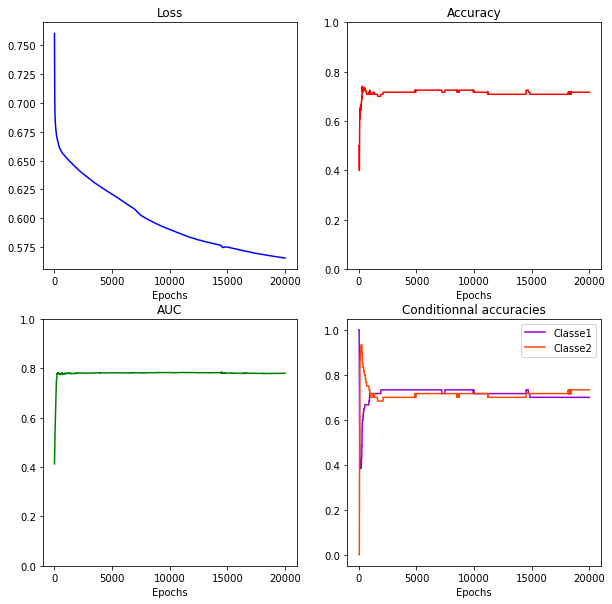

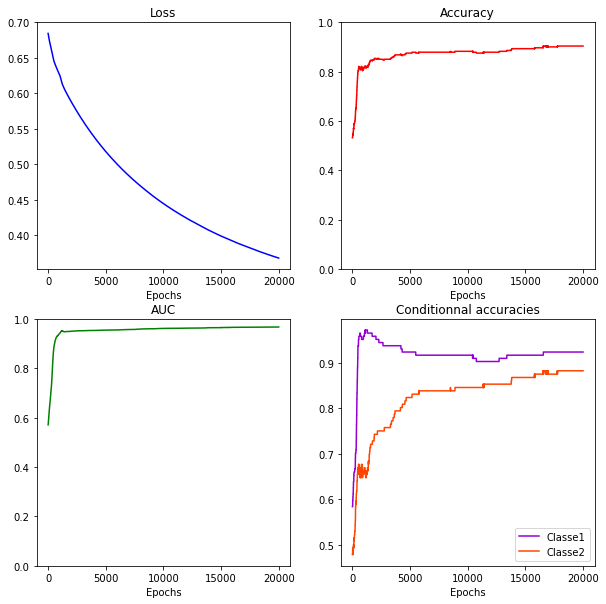

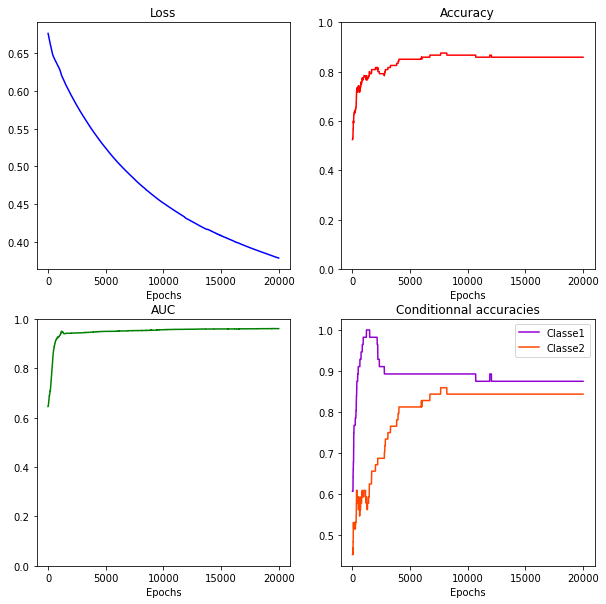

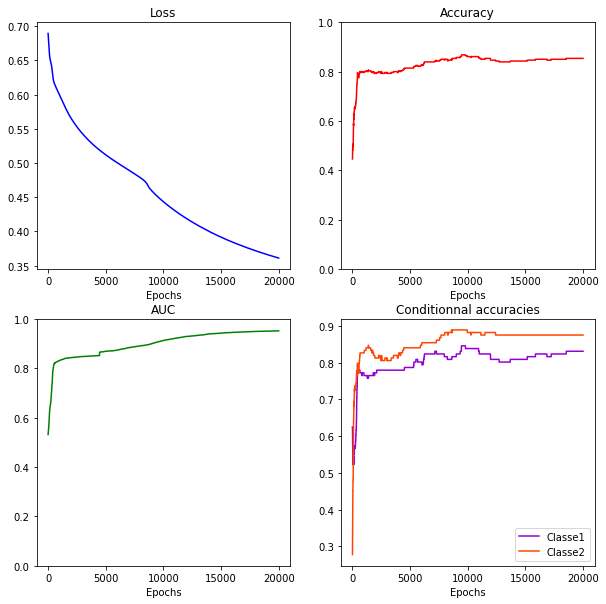

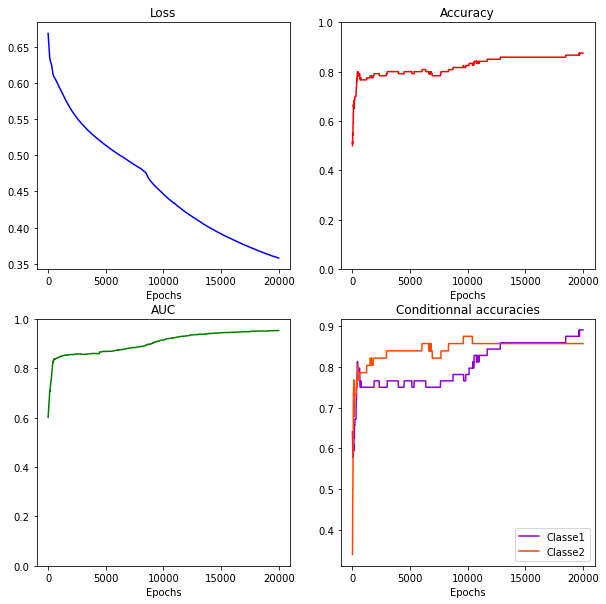

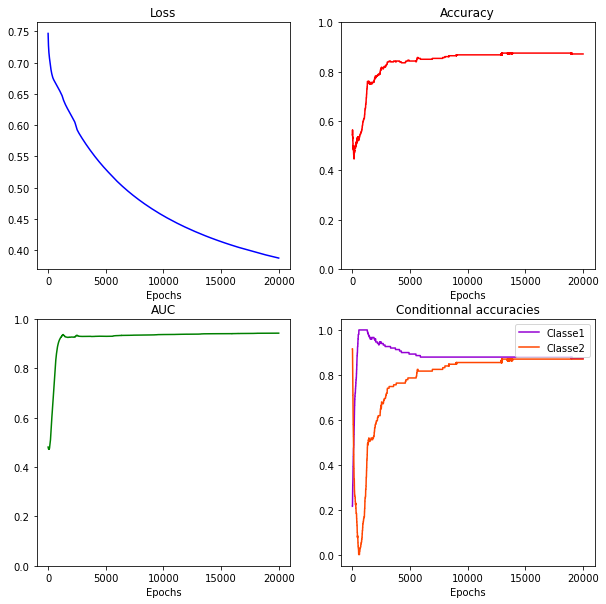

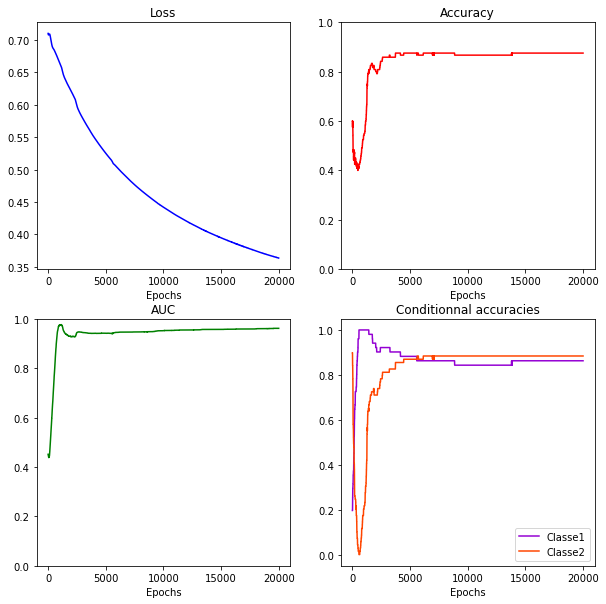

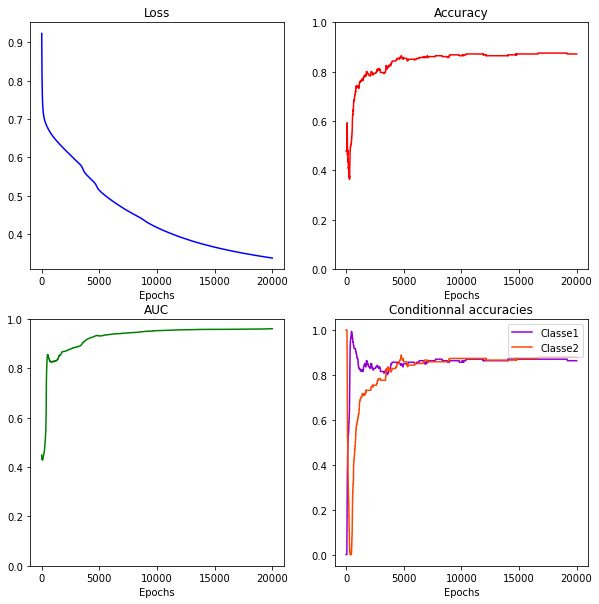

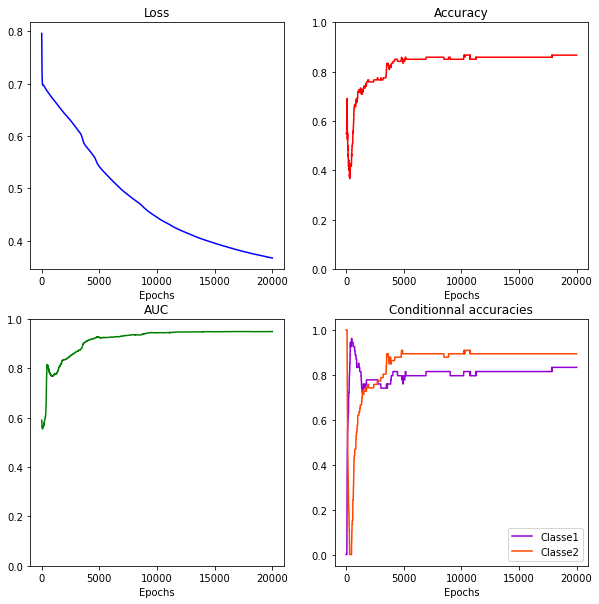

Performances par itération :
   acc_train  acc1_train  acc2_train  auc_train  acc_test  acc1_test  \
0   0.696429    0.628571    0.764286   0.749388  0.716667   0.700000   
1   0.903571    0.923611    0.882353   0.966401  0.858333   0.875000   
2   0.853571    0.830882    0.875000   0.950980  0.875000   0.890625   
3   0.871429    0.872483    0.870229   0.941493  0.875000   0.862745   
4   0.871429    0.863014    0.880597   0.959364  0.866667   0.833333   

   acc2_test  auc_test  
0   0.733333  0.779167  
1   0.843750  0.959821  
2   0.857143  0.952009  
3   0.884058  0.961068  
4   0.893939  0.948092  
Performance moyenne :
acc_train     0.839286
acc1_train    0.823712
acc2_train    0.854493
auc_train     0.913525
acc_test      0.838333
acc1_test     0.832341
acc2_test     0.842445
auc_test      0.920032
dtype: float64


In [8]:
np.random.seed(407)
SATURNN_models, SATURNN_iter, SATURNN_mean, SATURNN_std, SATURNN_times_fold, SATURNN_times = SATURNN_CrossValidation(X, Y, nb_neurons, r, normalisation, nb_folds, epoch, learning_rate, l2_reg)

#### Accuracies

- Accuracies over the 5-folds on both training and test sets

In [9]:
SATURNN_iter

,acc_train,acc1_train,acc2_train,auc_train,acc_test,acc1_test,acc2_test,auc_test
0,0.696429,0.628571,0.764286,0.749388,0.716667,0.700000,0.733333,0.779167
1,0.903571,0.923611,0.882353,0.966401,0.858333,0.875000,0.843750,0.959821
2,0.853571,0.830882,0.875000,0.950980,0.875000,0.890625,0.857143,0.952009
3,0.871429,0.872483,0.870229,0.941493,0.875000,0.862745,0.884058,0.961068
4,0.871429,0.863014,0.880597,0.959364,0.866667,0.833333,0.893939,0.948092


- Mean accuracies and standard deviation over the 5-folds

In [10]:
SATURNN_mean

acc_train     0.839286
acc1_train    0.823712
acc2_train    0.854493
auc_train     0.913525
acc_test      0.838333
acc1_test     0.832341
acc2_test     0.842445
auc_test      0.920032
dtype: float64

In [11]:
SATURNN_mean

acc_train     0.839286
acc1_train    0.823712
acc2_train    0.854493
auc_train     0.913525
acc_test      0.838333
acc1_test     0.832341
acc2_test     0.842445
auc_test      0.920032
dtype: float64

#### Computation Times

- Per fold

In [12]:
SATURNN_times_fold

[235.56729984283447,
 213.79061126708984,
 216.66764521598816,
 213.32895684242249,
 213.10035681724548]

- Mean and standard deviation of the computation times over the 5-folds

In [13]:
SATURNN_times

,mean,std
0,218.490974,9.653031


#### Estimated Splines of the best model over the 5-folds

The best model

In [14]:
best_model = SATURNN_models[np.argmax(SATURNN_iter['auc_test'])]

#### Plot the univariate splines estimated

Parameters:
- best_model: the best SATURNN model (for example, the one maximizing the AUC on the test sample)
- X: the features 
- normalisation: the normalization that was used to train the model
- print_bias (optional): True if the thresholds (the bias of the SATURNN) must be draswn.
- Save_Fig (optional): True if the figure must be saved
- name (optional): the name of the saved figure.

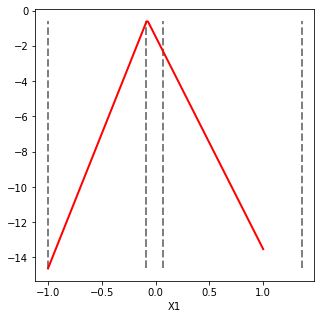

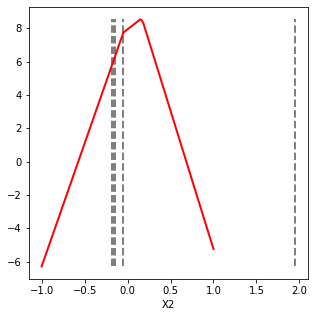

In [15]:
plot_splines_SATURNN(best_model.cpu(), X, normalisation, print_bias = True, Save_Fig=False)

#### Decision boundary

Reminder : working only for 2-D variables

/home/guyomard/.conda/envs/calcul/lib/python3.6/site-packages/ipykernel_launcher.py:97: UserWarning: No contour levels were found within the data range.


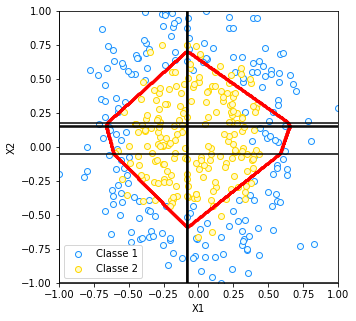

In [16]:
n_samples_x, n_samples_y = 300, 300
colors = ['black', 'green', 'blue', 'black']
path=[] 

extent_train = [np.min(X['X1']), np.max(X['X1']), np.min(X['X2']), np.max(X['X2'])]
outils_partition_train_NNMARS = Plot_partition_SATURNN(X[['X1', 'X2']], np.array(Y), normalisation, SATURNN_models[np.argmax(SATURNN_iter['auc_test'])].cpu().state_dict(), Save_Fig = True, name='SATURN')
meshgrid_train, Yhat_DL_train_NNMARS, paths_NNMARS = outils_partition_train_NNMARS.figure_partition()    

## Approximation by a Logistic Regression

When the number $p$ of neurons composing the SATURNN is large enough, the SATURNN can be well approximated by:

$$\delta^\text{LR PSI LIN}(x, \eta) = g_0(x)^T\eta,$$

A Logistic Regression applied to the features pre-processed by the non-linear transformation $g_0(x) = \nabla_\theta \psi(x,\theta^{(0)})$ that is the gradient of the score function of the SATURNN $\psi(x,\theta)$ with respect to its parameters $\theta$ taken at the point $\theta^{(0)}$.

**Learning the LR PSI LIN**

Learning the LR PSI LIN requires to minimize the following cost function:
$$\mathcal{L}^{\text{LR PSI LIN}}(\theta)= \frac{1}{N} \sum_{i=1}^N L\left(\sigma(g_0(x^{(i)}, \eta)), y^{(i)}\right),$$
such that
$$\hat{\eta}^{\text{LR PSI LIN}} = \arg\min_{\eta \in \mathcal{B}_2^{2p+1}(\theta^{(0)}, R)}   \mathcal{L}^{\text{LR PSI LIN}}(\eta),$$
with $L(\cdot)$ the binary cross-entropy used for binary classification tasks.

**Equivalence with the SATURNN**

As establihed in Theorem 3.6 in [ICML, 2023]:

*Let $\theta^{(0)} = [\beta_0^{(0)},\ldots,\beta_p^{(0)}, b_1^{(0)},\ldots,b_p^{(0)}]$ and $r, R>0$ such that $\beta_k^{(0)} \sim \mathcal{N}(0,1)$ and $b_k^{(0)} \sim \mathcal{U}[-r, +r]$. 
Then, we get
$$\sup_{\substack{\theta \in \mathcal{B}_2^{2p+1}(\theta^{(0)},R)\\ \eta \in \mathcal{B}_2^{2p+1}(0,R)}} \left|\mathcal{L}^\text{SATURNN}(\theta) - \mathcal{L}^{\text{LR}}(\eta) \right| \leq \frac{R^2}{2 \sqrt{p}}.$$*


### Let first train a SATURNN with a number $p$ of neurons large enought to get a good approximation

In [17]:
nb_neurons = 2000
normalisation = 'min_max'
r = 1
nb_folds = 5
epoch = 20000
learning_rate = 1e-1
l2_reg = 0

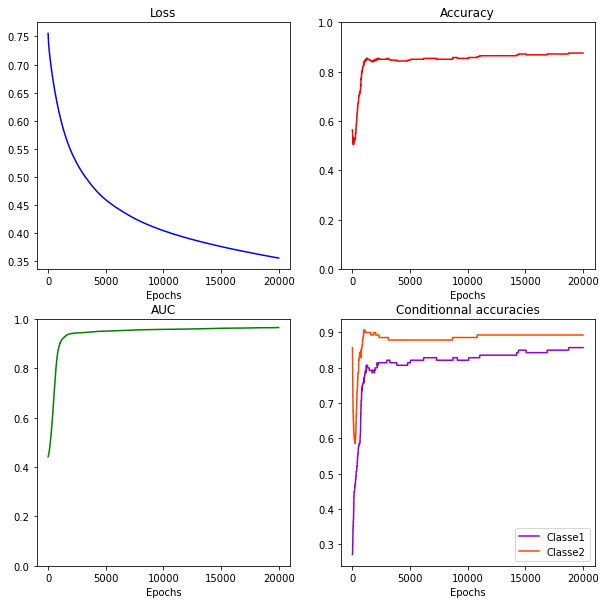

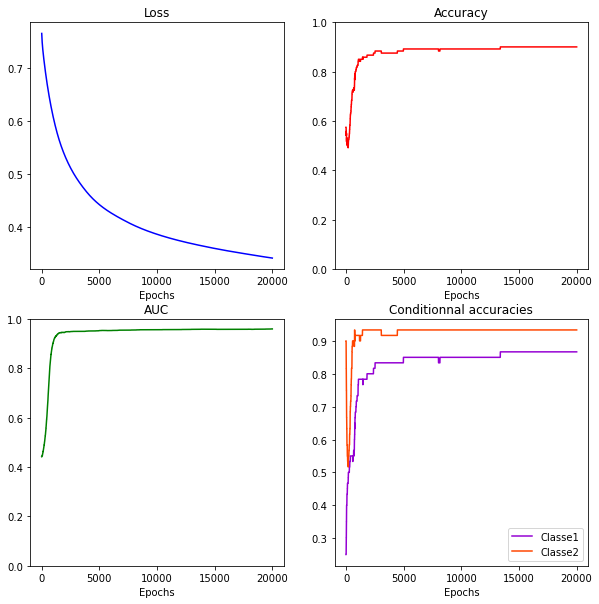

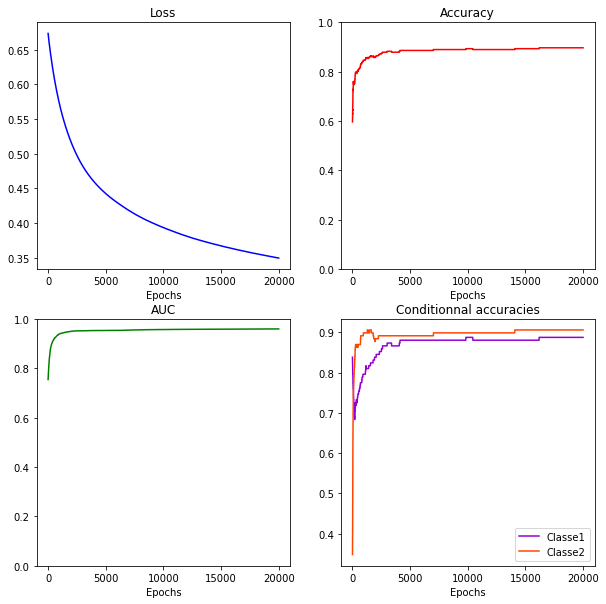

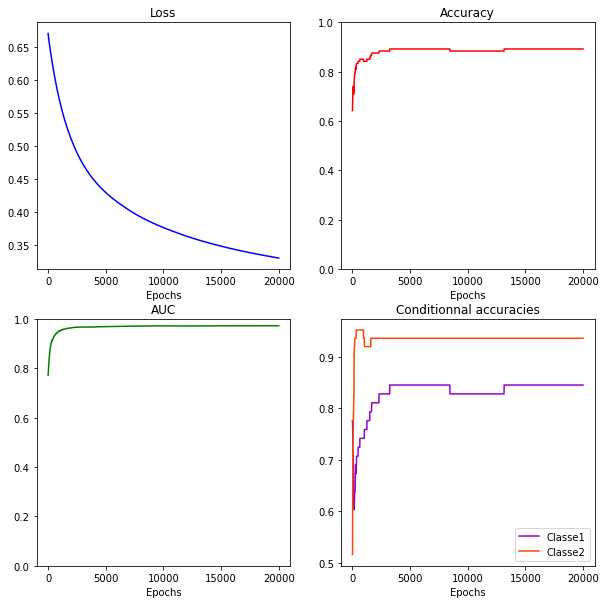

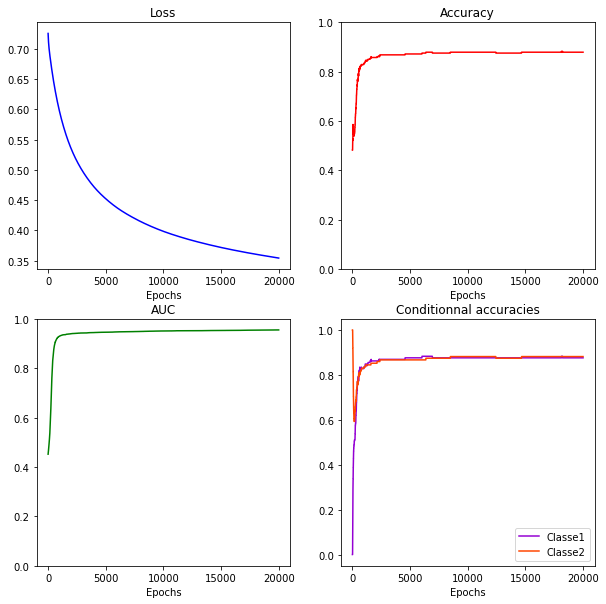

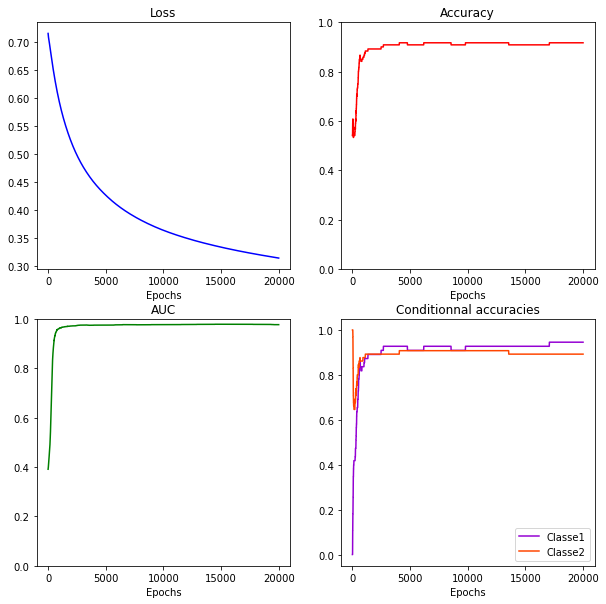

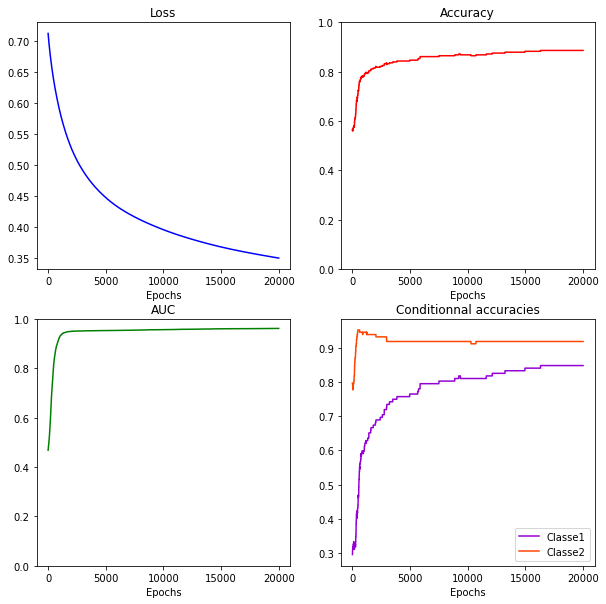

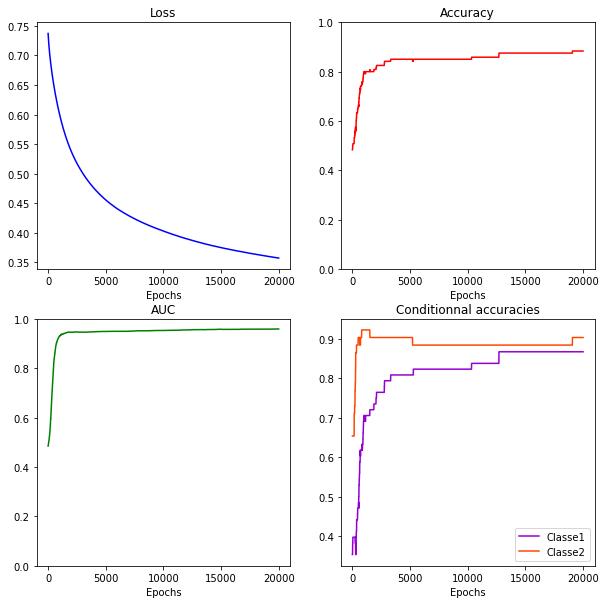

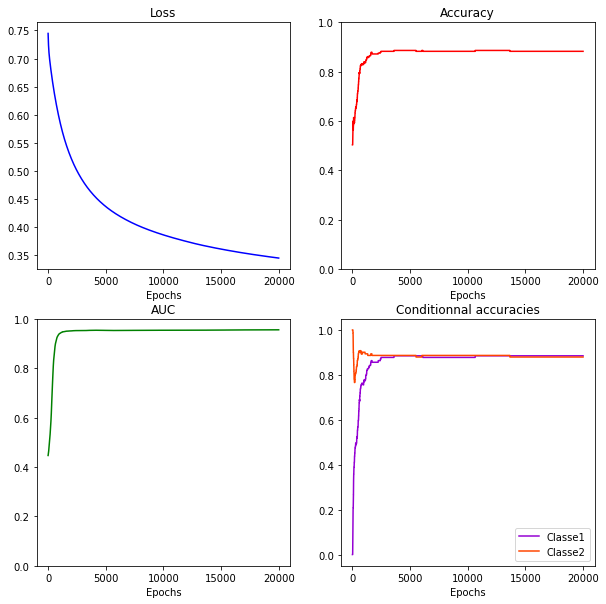

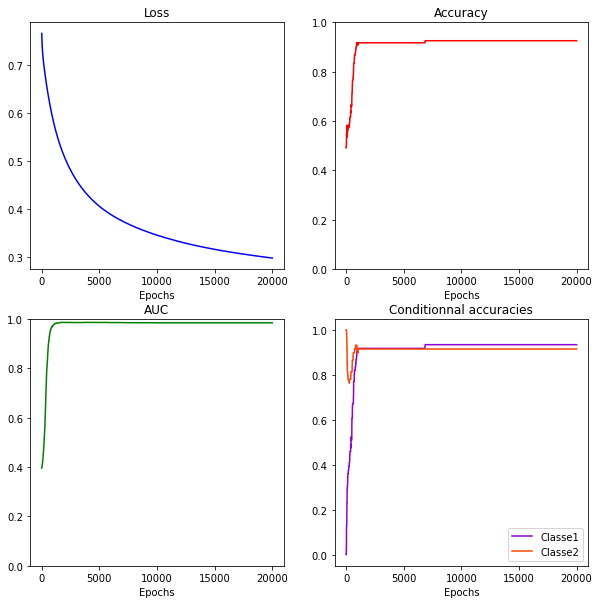

Performances par itération :
   acc_train  acc1_train  acc2_train  auc_train  acc_test  acc1_test  \
0   0.875000    0.857143    0.892857   0.964235  0.900000   0.866667   
1   0.896429    0.887324    0.905797   0.958665  0.891667   0.844828   
2   0.878571    0.875862    0.881481   0.954585  0.916667   0.945455   
3   0.885714    0.848485    0.918919   0.960688  0.883333   0.867647   
4   0.882143    0.884892    0.879433   0.955100  0.925000   0.934426   

   acc2_test  auc_test  
0   0.933333  0.958611  
1   0.935484  0.971357  
2   0.892308  0.975944  
3   0.903846  0.958428  
4   0.915254  0.983329  
Performance moyenne :
acc_train     0.883571
acc1_train    0.870741
acc2_train    0.895697
auc_train     0.958654
acc_test      0.903333
acc1_test     0.891804
acc2_test     0.916045
auc_test      0.969534
dtype: float64


In [18]:
np.random.seed(407)
SATURNNp_models, SATURNNp_iter, SATURNNp_mean, SATURNNp_std, SATURNNp_times_fold, SATURNNp_times = SATURNN_CrossValidation(X, Y, nb_neurons, r, normalisation, nb_folds, epoch, learning_rate, l2_reg)

#### Accuracies
- Accuracies over the 5-folds on both training and test sets

In [19]:
SATURNNp_iter

,acc_train,acc1_train,acc2_train,auc_train,acc_test,acc1_test,acc2_test,auc_test
0,0.875000,0.857143,0.892857,0.964235,0.900000,0.866667,0.933333,0.958611
1,0.896429,0.887324,0.905797,0.958665,0.891667,0.844828,0.935484,0.971357
2,0.878571,0.875862,0.881481,0.954585,0.916667,0.945455,0.892308,0.975944
3,0.885714,0.848485,0.918919,0.960688,0.883333,0.867647,0.903846,0.958428
4,0.882143,0.884892,0.879433,0.955100,0.925000,0.934426,0.915254,0.983329


- Mean accurcay and standard deviation over 5-folds

In [20]:
SATURNNp_mean

acc_train     0.883571
acc1_train    0.870741
acc2_train    0.895697
auc_train     0.958654
acc_test      0.903333
acc1_test     0.891804
acc2_test     0.916045
auc_test      0.969534
dtype: float64

In [21]:
SATURNNp_std

acc_train     0.008222
acc1_train    0.017188
acc2_train    0.016703
auc_train     0.004015
acc_test      0.017280
acc1_test     0.045048
acc2_test     0.018639
auc_test      0.010924
dtype: float64

#### Computation Times 

- Per fold

In [22]:
SATURNNp_times_fold

[215.96138215065002,
 214.49315071105957,
 214.65824103355408,
 214.48125076293945,
 217.8525857925415]

- Mean and standard deviation of the computation times over the 5-folds

In [23]:
SATURNNp_times

,mean,std
0,215.489322,1.458348


### Train the LR PSI LIN

We will approximate the best SATURNN, ie. the one maximizing the AUC on the test sample.


Parameters:
- normalisation: information about the data normalization {min_max, mean_sd, None}
- p: number of neurons composing the SATURNN one wants to approximate
- r: the radius of the open ball on which the data lie
- theta_init: the initialized parameters of the SATURNN one wants to approximate
- nb_folds: number of folds
- l2_reg: $\ell_2$-regulariation. The higher the parameter is, the more the model will be constrained such that the estimated parameters remains closed to 0.

In [24]:
theta_init = SATURNNp_models[np.argmax(SATURNNp_iter['auc_test'])]._init
l2_reg = 0

In [25]:
np.random.seed(407)
models_LRpsilin, LRpsilin_df_iter, LRpsilin_res_mean, LRpsilin_res_std, LRpsilin_times_fold, LRpsilin_times = LR_SATURNN_localy_linearized_CrossValidation(X, Y, normalisation, nb_neurons, r, theta_init, nb_folds, l2_reg)

Performances par itération :
   acc_train  acc1_train  acc2_train  auc_train  acc_test  acc1_test  \
0   0.946429    0.950000    0.942857   0.988980  0.883333   0.866667   
1   0.932143    0.948905    0.916084   0.987801  0.908333   0.936508   
2   0.917857    0.925926    0.910345   0.984010  0.875000   0.876923   
3   0.939286    0.959732    0.916031   0.987499  0.891667   0.901961   
4   0.925000    0.948148    0.903448   0.982069  0.908333   0.892308   

   acc2_test  auc_test  
0   0.900000  0.963056  
1   0.877193  0.973266  
2   0.872727  0.972587  
3   0.884058  0.966752  
4   0.927273  0.980140  
Performance moyenne :
acc_train     0.932143
acc1_train    0.946542
acc2_train    0.917753
auc_train     0.986072
acc_test      0.893333
acc1_test     0.894873
acc2_test     0.892250
auc_test      0.971160
dtype: float64


#### Accuracies

- Accuracies over the 5-folds on both training and test sets

In [26]:
LRpsilin_df_iter

,acc_train,acc1_train,acc2_train,auc_train,acc_test,acc1_test,acc2_test,auc_test
0,0.946429,0.950000,0.942857,0.988980,0.883333,0.866667,0.900000,0.963056
1,0.932143,0.948905,0.916084,0.987801,0.908333,0.936508,0.877193,0.973266
2,0.917857,0.925926,0.910345,0.984010,0.875000,0.876923,0.872727,0.972587
3,0.939286,0.959732,0.916031,0.987499,0.891667,0.901961,0.884058,0.966752
4,0.925000,0.948148,0.903448,0.982069,0.908333,0.892308,0.927273,0.980140


- Mean accurcay and standard deviation over 5-folds

In [27]:
LRpsilin_res_mean

acc_train     0.932143
acc1_train    0.946542
acc2_train    0.917753
auc_train     0.986072
acc_test      0.893333
acc1_test     0.894873
acc2_test     0.892250
auc_test      0.971160
dtype: float64

In [28]:
LRpsilin_res_std

acc_train     0.011294
acc1_train    0.012441
acc2_train    0.014962
auc_train     0.002905
acc_test      0.014907
acc1_test     0.026963
acc2_test     0.022145
auc_test      0.006562
dtype: float64

#### Computation Times

- Per fold

In [29]:
LRpsilin_times_fold

[0.5489175319671631,
 0.8004326820373535,
 0.5717496871948242,
 0.8405280113220215,
 0.5042521953582764]

- Mean and standard deviation of the computation times over the 5-folds

In [30]:
LRpsilin_times

,mean,std
0,0.653176,0.155293


#### Decision boundary 

We plot the decision bounadary of the best model (maximizing the AUC on the test sample) 

Reminder : working only for 2-D variables

Text(0.5, 1.0, 'LR PSI LIN')

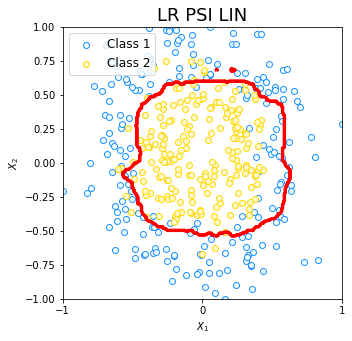

In [31]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
LR_psilin_utils = KernelLR(nb_neurons, r, 'kernel', theta_init)
grad_thetaInit_grid = LR_psilin_utils.compute_grad(torch.Tensor(data_grid.values,).to(device))
Y_LRpsilin_grid = models_LRpsilin[np.argmax(LRpsilin_df_iter['auc_test'])].predict(grad_thetaInit_grid.cpu().detach().numpy())
               
plt.figure(figsize=(5,5))
plt.scatter(X_norm.loc[np.where(np.array(Y)==0)[0], 'X1'], X_norm.loc[np.where(np.array(Y)==0)[0], 'X2'], edgecolor='dodgerblue', color='azure')
plt.scatter(X_norm.loc[np.where(np.array(Y)==1)[0], 'X1'], X_norm.loc[np.where(np.array(Y)==1)[0], 'X2'], edgecolor='gold', color='lemonchiffon')
#plt.contour(xx1, xx2, np.array(np.array(label_grid).reshape(xx1.shape)), colors='orange', linewidths=1.5, linestyles='-.')
plt.contour(xx1, xx2, np.array(Y_LRpsilin_grid).reshape(xx1.shape), colors='red', linewidths=2.5, linestyles='-')
plt.xlabel(r"$X_1$")
plt.ylabel(r"$X_2$")
plt.legend(['Class 1', 'Class 2'], loc='upper left', fontsize=12)
plt.xticks([-r,0,r])
plt.title('LR PSI LIN', fontsize=18)

#### Estimated Splines

Parameters:
- X, p, r, normalisation
- SATURNN_model: the SATURNN model one wants to approximate
- model_LR: the LR approximating the SATURNN
- print_bias (optional): If True, the thresholds (the bias of the SATURNN) are drawn.
- Save_Fig (optional): If True the figure is saved
- name (optional) : name of the saved figure

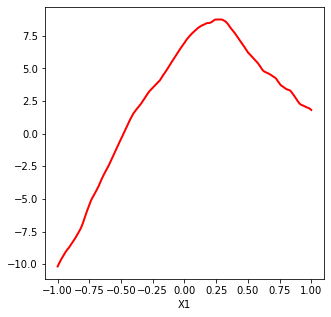

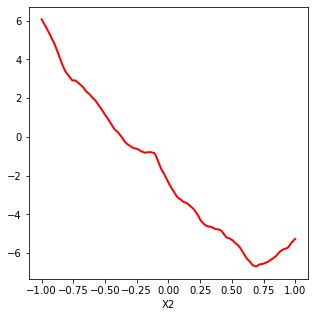

In [32]:
LRPSILIN_Splines(X, nb_neurons, r, normalisation, SATURNNp_models[np.argmax(SATURNNp_iter['auc_test'])], models_LRpsilin[np.argmax(LRpsilin_df_iter['auc_test'])], print_bias = False, Save_Fig=False)

## Approximation by a Kernel Logistic Regression

To come...